# League of Legends - An exploratory data analysis on high elo matches

This data focuses on the games in ranks: (Challenger, GrandMaster, Master).

Thank you to Minyong Shin on Kaggle for the dataset, which can be found [here](https://www.kaggle.com/gyejr95/league-of-legends-challenger-ranked-games2020).

# INDEX

## [Data Pre-processing](#data)

## [Statistics](#stats)
  * [Which side wins more?](#wins-more)
  * [What is the average game length?](#game-length)
  * [What are the differences between blue and red side?](#blue-vs-red)
  * [What factors are most impactful to winning? (Win Correlations)](#correlation)

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-whitegrid')

import warnings
warnings.filterwarnings('ignore')

<a id="data"></a>
# Data Preprocessing

In [3]:
dir = 'data/'
ranks = ['Challenger', 'GrandMaster', 'Master']

data = pd.DataFrame()

for rank in ranks:
    data_in = pd.read_csv(dir+rank+'_Ranked_Games.csv')
    data_in['Rank'] = rank
    print("Size of {}: {}".format(rank,data_in.shape))
    data = data.append(data_in, ignore_index=True)
    
print("Total size: {}".format(data.shape))

Size of Challenger: (26904, 51)
Size of GrandMaster: (65896, 51)
Size of Master: (107125, 51)
Total size: (199925, 51)


In [4]:
data.columns

Index(['gameId', 'gameDuraton', 'blueWins', 'blueFirstBlood', 'blueFirstTower',
       'blueFirstBaron', 'blueFirstDragon', 'blueFirstInhibitor',
       'blueDragonKills', 'blueBaronKills', 'blueTowerKills',
       'blueInhibitorKills', 'blueWardPlaced', 'blueWardkills', 'blueKills',
       'blueDeath', 'blueAssist', 'blueChampionDamageDealt', 'blueTotalGold',
       'blueTotalMinionKills', 'blueTotalLevel', 'blueAvgLevel',
       'blueJungleMinionKills', 'blueKillingSpree', 'blueTotalHeal',
       'blueObjectDamageDealt', 'redWins', 'redFirstBlood', 'redFirstTower',
       'redFirstBaron', 'redFirstDragon', 'redFirstInhibitor',
       'redDragonKills', 'redBaronKills', 'redTowerKills', 'redInhibitorKills',
       'redWardPlaced', 'redWardkills', 'redKills', 'redDeath', 'redAssist',
       'redChampionDamageDealt', 'redTotalGold', 'redTotalMinionKills',
       'redTotalLevel', 'redAvgLevel', 'redJungleMinionKills',
       'redKillingSpree', 'redTotalHeal', 'redObjectDamageDealt', 'Rank

In [5]:
data.head(3)

,gameId,gameDuraton,blueWins,blueFirstBlood,blueFirstTower,blueFirstBaron,blueFirstDragon,blueFirstInhibitor,blueDragonKills,blueBaronKills,...,redChampionDamageDealt,redTotalGold,redTotalMinionKills,redTotalLevel,redAvgLevel,redJungleMinionKills,redKillingSpree,redTotalHeal,redObjectDamageDealt,Rank
0,4247263043,1323,0,1,0,0,0,0,0,0,...,73016,49832,533,64,12.8,138,8,38711,60463,Challenger
1,4247155821,1317,1,0,0,0,1,0,2,0,...,44218,37136,571,59,11.8,134,3,24829,14105,Challenger
2,4243963257,932,0,0,0,0,0,0,0,0,...,30797,35364,400,50,10.0,89,5,12589,45201,Challenger


<a id="stats"></a>
# Statistics

<a id="wins-more"></a>
## Which side wins more?

Historically, it was known that blue side has a higher win rate. Let's see if that is still true in high elo.

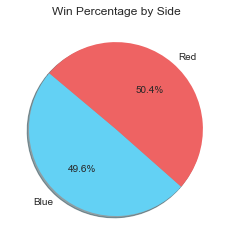

In [6]:
labels = ['Blue', 'Red']
sizes = [data['blueWins'].mean(),  data['redWins'].mean()]
colors = ['#63D1F4', '#EE6363']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        colors=colors, shadow=True, startangle=140)
plt.title("Win Percentage by Side")
plt.show()

<a id="game-length"></a>
## Average Game Length

Average game length: 23.89 minutes


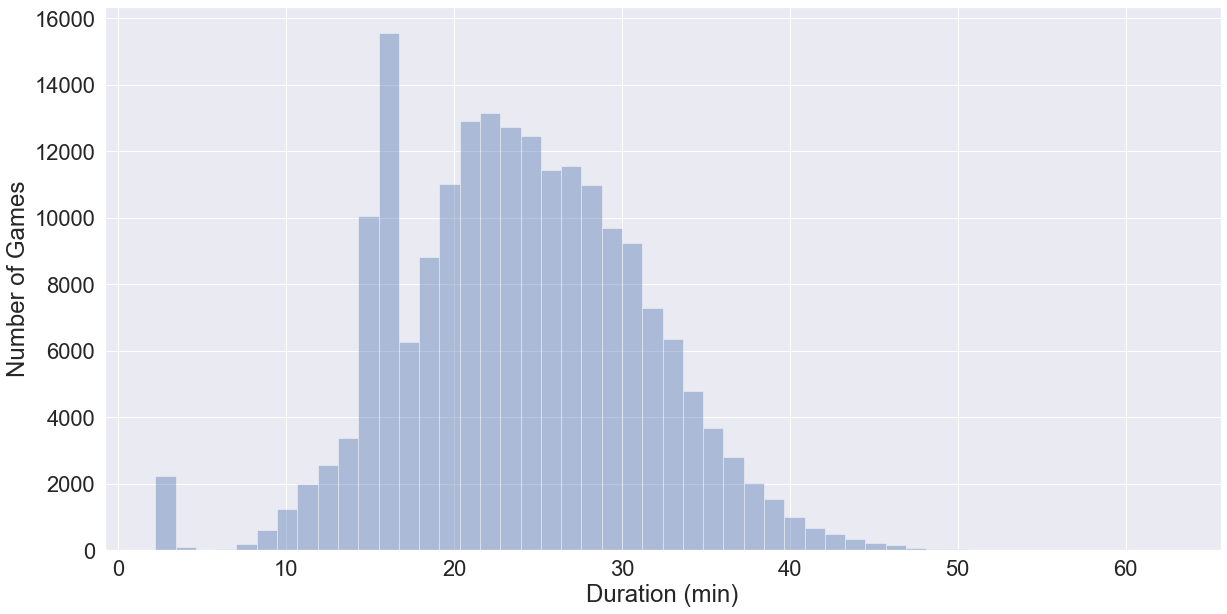

In [8]:
print("Average game length: {:.2f} minutes".format(data['gameDuraton'].mean()/60))
plt.figure(figsize=(20,10))
sns.distplot(data['gameDuraton']/60, hist=True, kde=False)
sns.set(font_scale = 2)
plt.xlabel('Duration (min)')
plt.ylabel('Number of Games')

plt.show()

<a id="blue-vs-red"></a>
## Blue vs Red side

In [7]:
categories = ['Wins', 'FirstBlood', 'FirstTower',
       'FirstBaron', 'FirstDragon', 'FirstInhibitor',
       'DragonKills', 'BaronKills', 'TowerKills',
       'InhibitorKills', 'WardPlaced', 'Wardkills', 'Kills',
       'Death', 'Assist', 'ChampionDamageDealt', 'TotalGold',
       'TotalMinionKills', 'TotalLevel', 'AvgLevel',
       'JungleMinionKills', 'KillingSpree', 'TotalHeal',
       'ObjectDamageDealt']

blue_percentage_data = {}

for category in categories:
    blue_total = data['blue'+category].sum()
    red_total = data['red'+category].sum()
    total = (blue_total + red_total).sum()
    
    blue_percent = blue_total/total
    red_percent = red_total/total
    
    blue_percentage_data[category] = blue_percent

blue_over = {k:v for k,v in blue_percentage_data.items() if (abs(v-0.5)>0.01) or k=="Wins"}
red_over = {k:1-v for k,v in blue_over.items()}

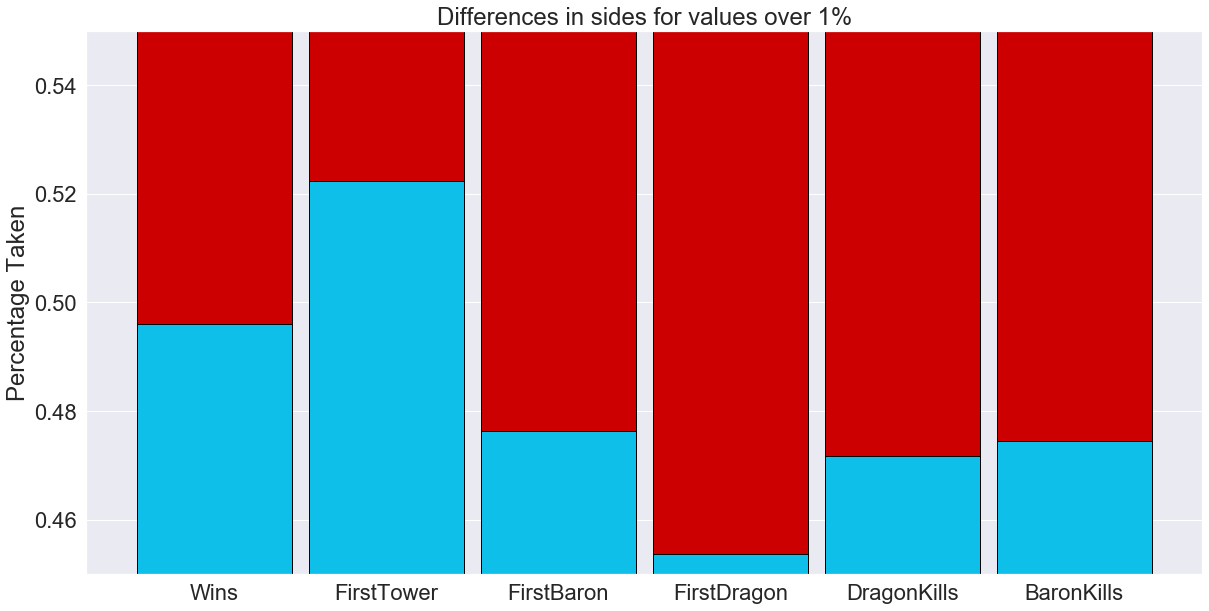

In [8]:
y = range(len(blue_over))
plt.figure(figsize=(20,10))
barWidth = 0.9
# blue
plt.bar(y, list(blue_over.values()), color='#0EBFE9', edgecolor='black', width=barWidth)
# red
plt.bar(y, list(red_over.values()), bottom=list(blue_over.values()), color='#cc0000', edgecolor='black', width=barWidth)

# Custom x axis
plt.xticks(y, blue_over.keys())
plt.ylim((0.45,0.55))
plt.ylabel("Percentage Taken")
plt.title("Differences in sides for values over 1%")
# Show graphic
plt.show()

<a id="correlation"></a>
## Win Correlations

In [9]:
blue_corr = data.drop('Rank', axis=1).corr()['blueWins'][:].sort_values(axis=0, ascending=False) 
red_corr = data.drop('Rank', axis=1).corr()['redWins'][:].sort_values(axis=0, ascending=False) 
# pearson method normalizes values for me
blue_corr.head()

blueWins                 1.000000
blueTowerKills           0.717463
blueFirstInhibitor       0.658354
blueInhibitorKills       0.574076
blueObjectDamageDealt    0.522638
Name: blueWins, dtype: float64

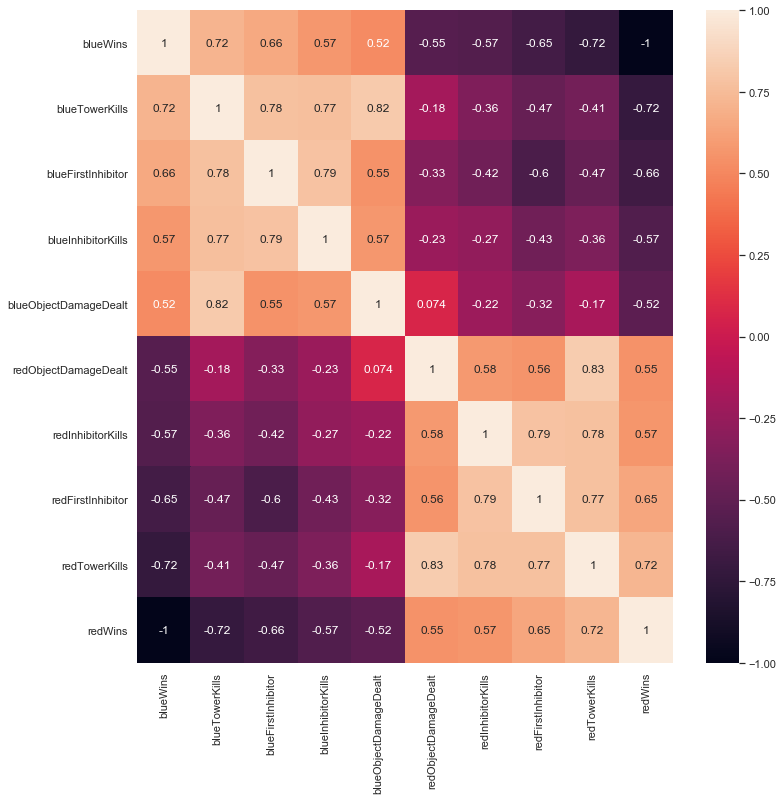

In [10]:
# get correlations of 0.5 or more
corr_cols = [prop for prop,corr in blue_corr.iteritems() if abs(corr)>0.5]
plt.figure(figsize=(12,12))
sns.set(font_scale = 1)
sns.heatmap(data[corr_cols].corr(), annot=True)

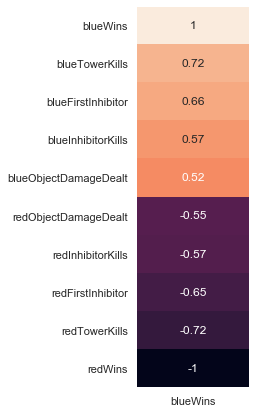

In [11]:
# Blue wins to any correlation above 0.5

plt.figure(figsize=(2,7))
sns.heatmap(blue_corr[corr_cols].to_frame(), annot=True, cbar=False)

To me, these seem very obvious. Destroy their base, win the game. Anyone who plays this game knows this, and you don't need any fancy graphs or statistics to understand this.


Instead, let's focus on the other variables. Although they have a lesser correlation, I believe they will give better insight as to what contributes to a win.

With my knowledge of the game, the variables from these properties that have more impact are:
- First Tower, Dragon, Baron (Team with the more initiative)
- First blood (Team morale)
- Dragon/Baron Kills (Objectives outside of base)
- Kills (blue kills or red deaths)
- Killing Sprees (shows a little more on individual level)
- Assists (Team participation)
- Total gold (Itemization)
- Jungle Minion Kills (optimization of resources)
- Total/average level (The effect of level)
- Champion Damage Dealt
- Total minion kills 
- Ward kills / placed (vision)
- Total Heal

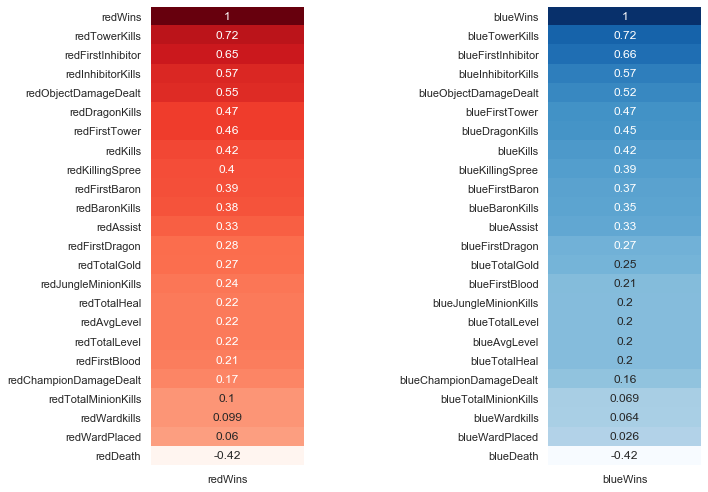

<Figure size 144x504 with 0 Axes>

<Figure size 144x504 with 0 Axes>

In [12]:
f, axes = plt.subplots(1, 2, figsize=(10, 7))

plt.figure(figsize=(2,7))
red_corra = [prop for prop,corr in blue_corr.iteritems() if 'red' in prop]
sns.heatmap(red_corr[red_corra].sort_values(axis=0, ascending=False).to_frame(), annot=True, cbar=False, ax=axes[0], cmap='Reds')

plt.figure(figsize=(2,7))
blue_corra = [prop for prop,corr in blue_corr.iteritems() if 'blue' in prop]
sns.heatmap(blue_corr[blue_corra].to_frame(), annot=True, cbar=False, ax=axes[1], cmap='Blues')

f.tight_layout(w_pad=8)

plt.show()

As expected, each property generally yields the same correlation whether you're on red side or blue side. More of everything, except deaths, proves a greater chance to winning. Break the enemy base, and you'll win.

One thing to note here, in terms of playstyle, is that it seems dragon control is more beneficial than baron. Additionally, warding and vision have very little correlation to winning relative to other factors. Although a small difference, the team who gets the first tower generally wins more than if a team has more kills than the other


Surprisingly, the correlation between wards placed/killed to wins is low. It's an understanding that vision equals winning, but according to statistics there is little affect.